                                                                                                            Sadık Ege Balkan
                                                                                                                       23790
# CS210 - Introduction to Data Science
# Individual Project

In this project, I am going to explore and analyse a real world dataset which includes taxi trips in a span
of two weeks in New York City.


# Data Exploration
I am going to use the file "taxi-trips.csv" which contains NYC Taxi Trip Dataset

First, I am going to read the data using pandas library.

In [1]:
import pandas as pd

filename = "taxi-trips.csv"
df = pd.read_csv(filename)
row_count=len(df.index)

As I know the pickup and dropoff coordinates, I will find the district names by applying reverse geocoding. Then I will add two new colums named "pickup district" and "dropoff district" that contains district names.

In [14]:
import reverse_geocoder as rg

coordinate=[]
coordinate2=[]
x=df["pickup_latitude"]
y=df["pickup_longitude"]
x2=df["dropoff_latitude"]
y2=df["dropoff_longitude"]

for i in range(row_count):
    z=x[i],y[i]
    coordinate.append(z)
    
for i in range(row_count):
    z2=x2[i],y2[i]
    coordinate2.append(z2)
    
results = rg.search(coordinate)
results2 = rg.search(coordinate2)
coordinate_list=[]
coordinate_list2=[]

for i in range(row_count):
    for key, value in results[i].items():
        if key=="name":
            coordinate_list.append(value) 
            
for a in range(row_count):
    for key, value in results2[a].items():
        if key=="name":
            coordinate_list2.append(value) 
            
df['pickup district'] = coordinate_list
df['dropoff district'] = coordinate_list2

Now, I will extract the top 5 districts where passengers prefer to leave and arrive.

Tables will be shown when you run that cell twice!


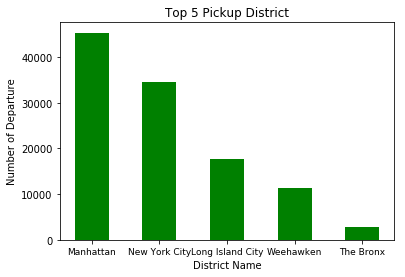

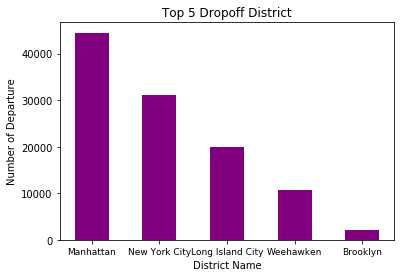

In [13]:
import collections
import matplotlib.pyplot as plt

print("Tables will be shown when you run that cell twice!")

counter=collections.Counter(coordinate_list)
counter2=collections.Counter(coordinate_list2)
pickup=counter.most_common(5)
drop=counter2.most_common(5)

district = [pickup[0][0],pickup[1][0],pickup[2][0],pickup[3][0],pickup[4][0]]
number = [pickup[0][1],pickup[1][1],pickup[2][1],pickup[3][1],pickup[4][1]]
x_pos = [i for i, _ in enumerate(district)]
width=0.5
plt.bar(x_pos, number,width, color='green')
plt.xlabel("District Name")
plt.ylabel("Number of Departure")
plt.title("Top 5 Pickup District")
plt.xticks(x_pos, district,fontsize=9)
plt.show()

district2 = [drop[0][0],drop[1][0],drop[2][0],drop[3][0],drop[4][0]]
number2 = [drop[0][1],drop[1][1],drop[2][1],drop[3][1],drop[4][1]]
x_pos2 = [i for i, _ in enumerate(district2)]
width2=0.5
plt.bar(x_pos2, number2,width2, color='purple')
plt.xlabel("District Name")
plt.ylabel("Number of Departure")
plt.title("Top 5 Dropoff District")
plt.xticks(x_pos2, district2,fontsize=9)
plt.show()

I will calculate the distance in miles format between pickup and dropoff coordinates. Then create a new column named "distance" and put the distance values there.

In [4]:
from geopy.distance import geodesic

distancelist=[]
for i in range(row_count):
    z=x[i],y[i]
    z2=x2[i],y2[i]
    distancelist.append(geodesic(z,z2).miles)
df['distance'] = distancelist

Adding a new column named 'time of day'. Aggregating timestamps in "pickup datetime" into 5 different categories and putting them into 'time of day':
- 7-9 AM: ”rush hour morning”
- 9 AM - 4 PM : ”afternoon”
- 4-6 PM : ”rush hour evening”
- 6-11 PM : ”evening”– 11 PM 
- 7 AM : ”late night”

In [5]:
pick=df["pickup_datetime"]
zaman=[]

for i in range(row_count):
    time=pick[i]
    saat=int(time[11:13])
    
    if 9>saat>=7:
        zaman.append("rush hour morning")        
    elif 16>saat>=9: 
        zaman.append("afternoon")        
    elif 18>saat>=16:
        zaman.append("rush hour evening")       
    elif 23>saat>=18:
        zaman.append("evening")        
    elif saat>=23 or saat<7:
        zaman.append("late night")
        
df['time of day'] = zaman

Final version of the table:

In [6]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup district,dropoff district,distance,time of day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.933406,rush hour evening
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,3.178194,evening
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,0.928961,rush hour morning
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.228003,afternoon
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.562103,afternoon
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,Hoboken,New York City,2.486098,evening
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,Manhattan,Weehawken,2.648687,evening
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,Manhattan,Manhattan,0.452659,afternoon
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,New York City,New York City,1.372636,evening
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,Long Island City,East New York,1.809375,late night


In [7]:
print("Shape of the table in (row count, column count) format:")
df.shape

Shape of the table in (row count, column count) format:


(118185, 15)

In [8]:
print("Datatypes of the colums that I add:")
print("pickup district:",df['pickup district'].dtype)
print("dropoff district:",df['dropoff district'].dtype)
print("distance:",df['distance'].dtype)
print("time of day:",df['time of day'].dtype)

Datatypes of the colums that I add:
pickup district: object
dropoff district: object
distance: float64
time of day: object


The average distance varies as time of the day changes:

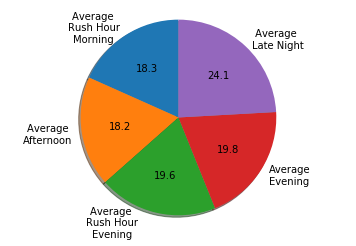

In [9]:
labels = 'Average  \nRush Hour\nMorning  ', 'Average \nAfternoon', 'Average       \nRush Hour     \nEvening       ', 'Average\nEvening', ' Average\nLate Night'
sizes = [df[df['time of day']=='rush hour morning']['distance'].mean(),df[df['time of day']=='afternoon']['distance'].mean(),df[df['time of day']=='rush hour evening']['distance'].mean(),df[df['time of day']=='evening']['distance'].mean(),df[df['time of day']=='late night']['distance'].mean()]
plt.pie(sizes, labels=labels, autopct='%.1f', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

The trip duration varies as time of the day changes:

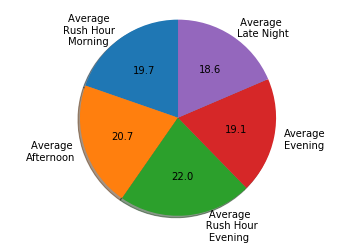

In [10]:
labels = 'Average  \nRush Hour\nMorning  ', 'Average \nAfternoon', '       Average\n      Rush Hour\n       Evening', 'Average\nEvening', ' Average\nLate Night'
sizes = [df[df['time of day']=='rush hour morning']['trip_duration'].mean(),df[df['time of day']=='afternoon']['trip_duration'].mean(),df[df['time of day']=='rush hour evening']['trip_duration'].mean(),df[df['time of day']=='evening']['trip_duration'].mean(),df[df['time of day']=='late night']['trip_duration'].mean()]
plt.pie(sizes, labels=labels, autopct='%.1f', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

# Hypothesis Testing

1- Does passenger group size affect the distance?

- Null hypothesis: passenger group size has no effect on the distance.


In [11]:
from scipy import stats
one1=df[df['passenger_count']<=1]['distance']
one2=df[df['passenger_count']>1]['distance']

two1=df[df['passenger_count']<=2]['distance']
two2=df[df['passenger_count']>2]['distance']

three1=df[df['passenger_count']<=3]['distance']
three2=df[df['passenger_count']>3]['distance']

four1=df[df['passenger_count']<=4]['distance']
four2=df[df['passenger_count']>4]['distance']

five1=df[df['passenger_count']<=5]['distance']
five2=df[df['passenger_count']>5]['distance']

print("Reults of group size=1 or more =",stats.ttest_ind(one1, one2))
print("Reults of group size=2 or different =",stats.ttest_ind(two1, two2))
print("Reults of group size=3 or different =",stats.ttest_ind(three1, three2))
print("Reults of group size=4 or different =",stats.ttest_ind(four1, four2))
print("Reults of group size=5 or different =",stats.ttest_ind(five1, five2))

Reults of group size=1 or more = Ttest_indResult(statistic=-4.956419749353629, pvalue=7.190307392905845e-07)
Reults of group size=2 or different = Ttest_indResult(statistic=-0.6118108327738461, pvalue=0.5406640986144986)
Reults of group size=3 or different = Ttest_indResult(statistic=-0.4838192890252675, pvalue=0.6285150209250823)
Reults of group size=4 or different = Ttest_indResult(statistic=-0.36830992558896164, pvalue=0.7126428120418721)
Reults of group size=5 or different = Ttest_indResult(statistic=0.07438460630823925, pvalue=0.9407044831474014)


As we can observe from the test results only the p-value of the test which is between 1 person and more than 1 person is smaller than 0.05. That indicates that there is a diffrence between the distance when the the passenger is single and not single. Since the statistic is negative, if the passenger is single, distance will be less. If the passenger is not single, distance will be longer. But, when group size is more than 1 there is no connection with others.

Null hypothesis rejected. Passenger group size affect the distance. 


2- Do trip distances increase in weekends?

- Null hypothesis: The day of the week has no effect on the distance.

In [12]:
from datetime import datetime

pickup=pd.to_datetime(df["pickup_datetime"])
weekend=[]
weekday=[]

for i in range(pickup.size):
    if pickup[i].day_name() == "Saturday" or pickup[i].day_name() == "Sunday":
        weekend.append(distancelist[i])
    else:
        weekday.append(distancelist[i])
        
p=stats.ttest_ind(weekday, weekend)[1]
statistic=stats.ttest_ind(weekday, weekend)[0]
print("Statistic =",stats.ttest_ind(weekday, weekend)[0],"P-value =",stats.ttest_ind(weekday, weekend)[1])
if p<0.05:
    print("P-value is smaller than 0.05. That means week of the day has an effect on the distance. Null hypothesis rejected.")
    if(statistic>0):
        print("The test score is positive which indicates that trip distances decrease in weekends.")
    else:
        print("The test score is negative which indicates that trip distances increase in weekends.")
else:
    print("P-value is greater than 0.05. Null hypothesis accepted. The day of the week has no effect on the distance.")

Statistic = -5.592069261035191 P-value = 2.248731884486963e-08
P-value is smaller than 0.05. That means week of the day has an effect on the distance. Null hypothesis rejected.
The test score is negative which indicates that trip distances increase in weekends.
